In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# Evaluating Regression Models Exercises

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.



##### 1. Load your zillow dataset.

In [2]:
import wrangle
import prepare

In [3]:
df = wrangle.get_zillow()
df = wrangle.wrangle_zillow(df)
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,county
4,4,2.0,3633.0,296425.0,2005,6941.39,los_angeles
6,3,4.0,1620.0,847770.0,2011,10244.94,los_angeles
7,3,2.0,2077.0,646760.0,1926,7924.68,los_angeles
18,3,1.0,1244.0,169471.0,1950,2532.88,los_angeles
19,3,2.0,1300.0,233266.0,1950,3110.99,los_angeles


In [4]:
train, validate, test = prepare.split_zillow(df)
columns_to_scale = train.select_dtypes('number').columns
train, validate, test = prepare.data_scaler(train, validate, test, columns_to_scale)
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,county
492481,0.142857,0.103448,0.232857,0.261201,0.711628,0.049164,orange
108997,0.142857,0.172414,0.490781,0.440578,0.651163,0.066706,los_angeles
1787613,0.142857,0.103448,0.252952,0.046021,0.781395,0.008569,ventura
953750,0.142857,0.103448,0.283613,0.441168,0.716279,0.087722,los_angeles
1302574,0.285714,0.310345,0.764450,0.543872,0.934884,0.109837,los_angeles


##### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.

In [5]:
# creating the OLS model object
lm = LinearRegression()

# fitting the model to training data
lm.fit(train[['calculatedfinishedsquarefeet']], train.taxvaluedollarcnt)

# making a prediction
train['yhat'] = lm.predict(train[['calculatedfinishedsquarefeet']])

train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,county,yhat
492481,0.142857,0.103448,0.232857,0.261201,0.711628,0.049164,orange,0.166556
108997,0.142857,0.172414,0.490781,0.440578,0.651163,0.066706,los_angeles,0.329765
1787613,0.142857,0.103448,0.252952,0.046021,0.781395,0.008569,ventura,0.179272
953750,0.142857,0.103448,0.283613,0.441168,0.716279,0.087722,los_angeles,0.198673
1302574,0.285714,0.310345,0.764450,0.543872,0.934884,0.109837,los_angeles,0.502936


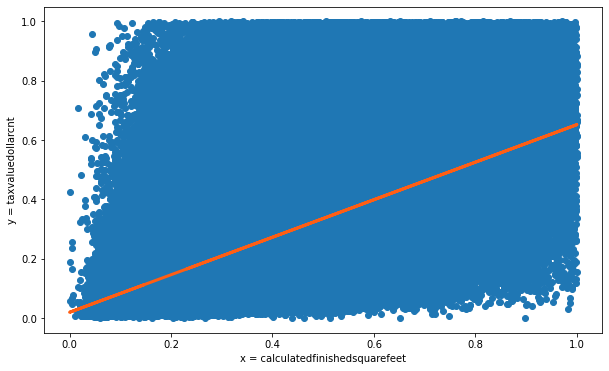

In [6]:
# Plotting the resulting regression line
plt.figure(figsize=(10, 6))
plt.scatter(train.calculatedfinishedsquarefeet, train.taxvaluedollarcnt)
plt.plot(train.calculatedfinishedsquarefeet, train.yhat, color = "#FF5E13", linewidth = 3)
plt.xlabel('x = calculatedfinishedsquarefeet')
plt.ylabel('y = taxvaluedollarcnt')
plt.show()

##### 3. Plot the residuals for the linear regression model that you made.

In [7]:
train['residual'] =  train['taxvaluedollarcnt'] - train['yhat']

In [8]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,county,yhat,residual
492481,0.142857,0.103448,0.232857,0.261201,0.711628,0.049164,orange,0.166556,0.094646
108997,0.142857,0.172414,0.490781,0.440578,0.651163,0.066706,los_angeles,0.329765,0.110813
1787613,0.142857,0.103448,0.252952,0.046021,0.781395,0.008569,ventura,0.179272,-0.133251
953750,0.142857,0.103448,0.283613,0.441168,0.716279,0.087722,los_angeles,0.198673,0.242495
1302574,0.285714,0.310345,0.764450,0.543872,0.934884,0.109837,los_angeles,0.502936,0.040936


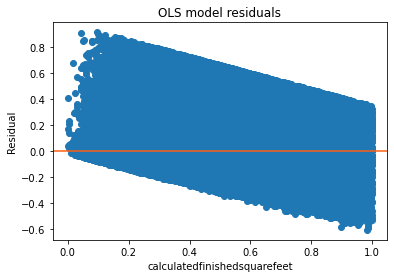

In [9]:
plt.scatter(train.calculatedfinishedsquarefeet, train.residual)
plt.axhline(y = 0, ls = '-', color = "#FF5E13")
plt.xlabel('calculatedfinishedsquarefeet')
plt.ylabel('Residual')
plt.title('OLS model residuals')
plt.show()

##### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [28]:
MSE = mean_squared_error(train.taxvaluedollarcnt, train.yhat)
SSE = MSE * len(train)
RMSE = mean_squared_error(train.taxvaluedollarcnt, train.yhat, squared = False)
ESS = sum((train.yhat - train.taxvaluedollarcnt.mean())**2)
TSS = ESS + SSE

print(f"Sum of squared errors: {SSE}")
print(f"Explained sum of squares: {ESS}")
print(f"Total sum of squares: {TSS} ")
print(f"Mean squared error: {MSE}")
print(f"Root mean squared error: {RMSE}")

Sum of squared errors: 23437.0231996512
Explained sum of squares: 10552.400336555667
Total sum of squares: 33989.42353620687 
Mean squared error: 0.02023377397424114
Root mean squared error: 0.14224547083911368


In [11]:
r2_score(train.taxvaluedollarcnt, train.yhat)

0.31046129174015

In [12]:
R2 = ESS/TSS
R2

0.3104612917402037

In [13]:
((train.yhat - train.taxvaluedollarcnt.mean())**2).sum()

10552.400336552822

##### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [29]:
train['baseline'] = train.taxvaluedollarcnt.mean()
MSE = mean_squared_error(train.taxvaluedollarcnt, train.baseline)
SSE = MSE * len(train)
RMSE = mean_squared_error(train.taxvaluedollarcnt, train.baseline, squared = False)
ESS = sum((train.baseline - train.taxvaluedollarcnt.mean())**2)
TSS = ESS + SSE

print(f"Sum of squared errors: {SSE}")
print(f"Explained sum of squares: {ESS}")
print(f"Total sum of squares: {TSS} ")
print(f"Mean squared error: {MSE}")
print(f"Root mean squared error: {RMSE}")

Sum of squared errors: 33989.423536204216
Explained sum of squares: 0.0
Total sum of squares: 33989.423536204216 
Mean squared error: 0.02934392766042674
Root mean squared error: 0.17130069369511244


##### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [31]:
model_SSE = mean_squared_error(train.taxvaluedollarcnt, train.yhat) * len(train)
baseline_SSE = mean_squared_error(train.taxvaluedollarcnt, train.baseline) * len(train)
print(f"The baseline model sum of squared errors is: {baseline_SSE}")
print(f"The model sum of squared errors is: {model_SSE}")

if model_SSE < baseline_SSE:
    print("The OLS linear regression model beats the baseline model.")
else:
    print("The OLS linear regression model does not beat the baseline model.")

The baseline model sum of squared errors is: 33989.423536204216
The model sum of squared errors is: 23437.0231996512
The OLS linear regression model beats the baseline model.


##### 7. What is the amount of variance explained in your model?

In [33]:
print(f"The amount of variance explained in my model is: \
{(baseline_SSE) - (model_SSE)}")

The amount of variance explained in my model is: 10552.400336553015


##### 8. Is your model better than the baseline model?

My model is better than the baseline model but it's not a great model.

##### 9. Create a file named evaluate.py that contains the following functions.
- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [26]:
def plot_residuals(x, y, yhat):
    residual = y - yhat
    baseline_residual = y - y.mean()

    plt.figure(figsize = (11,5))

    plt.subplot(121)
    plt.scatter(x, baseline_residual)
    plt.axhline(y = 0, ls = '-', color = "#FF5E13")
    plt.xlabel('x')
    plt.ylabel('Residual')
    plt.title('Baseline Residuals')

    plt.subplot(122)
    plt.scatter(x, residual)
    plt.axhline(y = 0, ls = '-', color = "#FF5E13")
    plt.xlabel('x')
    plt.ylabel('Residual')
    plt.title('OLS model residuals')

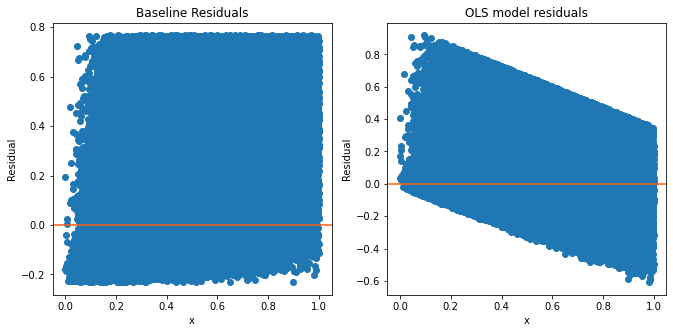

In [27]:
plot_residuals(train.calculatedfinishedsquarefeet, train.taxvaluedollarcnt, train.yhat)

In [20]:
def regression_errors(y, yhat):
    '''
    Function that takes in a target variable and target variable predictions made by a linear regression model. It prints out the 
    following information:
            Sum of squared errors
            Explained sum of squares
            Total sum of squares
            Mean squared error
            Root mean squared error

    Arguments:  y - the actual datapoints of a target variable
                yhat - the predicted datapoints of a target variable made by a linear regression model
    '''
    MSE = mean_squared_error(y, yhat)
    SSE = MSE * len(y)
    RMSE = mean_squared_error(y, yhat, squared = False)
    ESS = sum((yhat - y.mean())**2)
    TSS = ESS + SSE

    return SSE, ESS, TSS, MSE, RMSE

In [21]:
regression_errors(train.taxvaluedollarcnt, train.yhat)

(23437.0231996512,
 10552.400336555667,
 33989.42353620687,
 0.02023377397424114,
 0.14224547083911368)

In [22]:
def baseline_mean_errors(y):
    baseline = pd.Series(y.mean()).repeat(len(y))
    MSE = mean_squared_error(y, baseline)
    SSE = MSE * len(y)
    RMSE = mean_squared_error(y, baseline, squared = False)

    return MSE, SSE, RMSE

In [23]:
baseline_mean_errors(train.taxvaluedollarcnt)

(0.02934392766042674, 33989.423536204216, 0.17130069369511244)

In [24]:
def better_than_baseline(y, yhat):
    model_SSE, model_ESS, model_TSS, model_MSE, model_RMSE = regression_errors(y, yhat)
    baseline_MSE, baseline_SSE, baseline_RMSE = baseline_mean_errors(y)

    return (model_SSE - baseline_MSE) > 0

In [25]:
better_than_baseline(train.taxvaluedollarcnt, train.yhat)

True